# Leer datos de inmuebles

In [ ]:
!pip install -U -q PyDrive

Estructura requerida para CSV: 

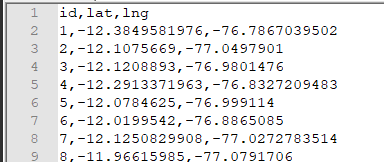

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#CSV con datos de inmuebles
link = 'https://drive.google.com/file/d/1hWnP7jMSNVaWDkTAbwq9oITBD-qRkV7I' # Enlace de drive del CSV

fluff, id = link.split('d/')
print(id)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('export.csv')  

1hWnP7jMSNVaWDkTAbwq9oITBD-qRkV7I


In [ ]:
import pandas as pd
df = pd.read_csv('export.csv')
df = df.reset_index()
df['id'] = df['id'].astype('int')

print(df)

      index    id        lat        lng
0         0     1 -12.384958 -76.786704
1         1     2 -12.107567 -77.049790
2         2     3 -12.120889 -76.980148
3         3     4 -12.291337 -76.832721
4         4     5 -12.078463 -76.999114
...     ...   ...        ...        ...
8108   8108  8109 -12.220929 -76.935488
8109   8109  8110 -11.979789 -77.091756
8110   8110  8111 -12.093845 -76.925544
8111   8111  8112 -12.002000 -76.752000
8112   8112  8113 -11.940000 -77.126000

[8113 rows x 4 columns]


# Generar relación con lugares de interes

In [ ]:
lugares_interes = {
    'bank': 1,
    'drugstore': 2, 
    'supermarket': 3,
    'restaurant': 4,
    'hospital': 5,
    'school': 6,
    'gym': 7,
    'park': 8,
    'police': 9,
    'movie_theater': 10
}

In [ ]:
import requests
import json

radius = 1000 #metros
API_KEY = "" #aqui va la API key de Google maps
payload={}
headers = {}
list_relacion = []
num_calls = 0
for index, row in df.iterrows():
    id_real_estate = row['id']
    lat = row['lat']
    lng = row['lng']
    url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lat}%2C{lng}&radius={radius}&key={API_KEY}"
    response = requests.request("GET", url, headers=headers, data=payload)
    num_calls = num_calls + 1
    print(f"Numero de llamadas al API de Google: {num_calls}")
    response_obj = json.loads(response.text)
    if response_obj["results"]: 
      for lugar_interes in lugares_interes: 
        for result in response_obj["results"]: 
          if any(lugar_interes in s for s in result["types"]):
            relacion = (id_real_estate, lugares_interes[lugar_interes])
            list_relacion.append(relacion)  
            break

In [ ]:
print(f"Numero de llamadas al API de Google: {num_calls}")

In [ ]:
print(list_relacion)

# Exportar resultados a Archivo de texto

In [ ]:
with open('/REALESTATE-INTERESTPLACE.txt', 'w') as writefile:
    for relacion in list_relacion: 
      writefile.write(f"INSERT INTO REAL_ESTATE_INTEREST_DETAIL (idRealEstate,idTypeInterestPlace) VALUES ({int(relacion[0])},{int(relacion[1])});\n")